In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from traitlets import validate
import sklearn.model_selection
import numpy as np
import tensorflow as tf
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
DATA2_PATH=r"C:\Users\B.BASI REDDY\Documents\tbdetection"
DATA2_TRAIN_NORNAL=DATA2_PATH+"/Normal/"
DATA2_TRAIN_Tuberculosis=DATA2_PATH+"/Tuberculosis/"

Normal_img=os.listdir(DATA2_TRAIN_NORNAL)
Tuberculosis_img=os.listdir(DATA2_TRAIN_Tuberculosis)
# DATA2_TRAIN_NORNAL=DATA2_TRAIN_NORNAL+Normal_img
# DATA2_TEST_Tuberculosis=DATA2_TEST_Tuberculosis+Tuberculosis_img
dnorm=pd.DataFrame(Normal_img,columns=["images"])
dnorm["labels"]=1
dnorm["images"]=DATA2_TRAIN_NORNAL+dnorm["images"]

dtuber=pd.DataFrame(Tuberculosis_img,columns=["images"])
dtuber["labels"]=3
dtuber["images"]=DATA2_TRAIN_Tuberculosis+dtuber["images"]


DF2=pd.concat([dnorm,dtuber],ignore_index=True)
DF2["mat_images"]=DF2['images'].apply(lambda x: cv2.resize(cv2.imread(x,0) ,( 224, 224)))
DF2.sample(frac=1, random_state=42).reset_index(drop=True)

,images,labels,mat_images
0,C:\Users\B.BASI REDDY\Documents\tbdetection/No...,1,"[[170, 175, 175, 174, 171, 174, 170, 165, 164,..."
1,C:\Users\B.BASI REDDY\Documents\tbdetection/No...,1,"[[3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,..."
2,C:\Users\B.BASI REDDY\Documents\tbdetection/No...,1,"[[0, 1, 16, 6, 5, 6, 5, 4, 4, 5, 5, 5, 4, 4, 4..."
3,C:\Users\B.BASI REDDY\Documents\tbdetection/No...,1,"[[248, 243, 237, 231, 226, 222, 219, 218, 214,..."
4,C:\Users\B.BASI REDDY\Documents\tbdetection/No...,1,"[[30, 11, 3, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 5, ..."
...,...,...,...
75,C:\Users\B.BASI REDDY\Documents\tbdetection/No...,1,"[[62, 37, 24, 17, 10, 9, 8, 9, 7, 7, 7, 7, 7, ..."
76,C:\Users\B.BASI REDDY\Documents\tbdetection/Tu...,3,"[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,..."
77,C:\Users\B.BASI REDDY\Documents\tbdetection/Tu...,3,"[[0, 0, 0, 0, 0, 0, 1, 2, 6, 6, 6, 6, 6, 6, 6,..."
78,C:\Users\B.BASI REDDY\Documents\tbdetection/No...,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [3]:
F_DATA=DF2
F_DATA.sample(frac=1, random_state=42).reset_index(drop=True)
F_DATA

,images,labels,mat_images
0,C:\Users\B.BASI REDDY\Documents\tbdetection/No...,1,"[[3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,..."
1,C:\Users\B.BASI REDDY\Documents\tbdetection/No...,1,"[[239, 230, 225, 219, 214, 209, 206, 201, 198,..."
2,C:\Users\B.BASI REDDY\Documents\tbdetection/No...,1,"[[151, 144, 122, 65, 21, 6, 3, 1, 0, 0, 0, 0, ..."
3,C:\Users\B.BASI REDDY\Documents\tbdetection/No...,1,"[[184, 164, 144, 128, 118, 109, 98, 97, 98, 98..."
4,C:\Users\B.BASI REDDY\Documents\tbdetection/No...,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...
75,C:\Users\B.BASI REDDY\Documents\tbdetection/Tu...,3,"[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,..."
76,C:\Users\B.BASI REDDY\Documents\tbdetection/Tu...,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
77,C:\Users\B.BASI REDDY\Documents\tbdetection/Tu...,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
78,C:\Users\B.BASI REDDY\Documents\tbdetection/Tu...,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [4]:
X=F_DATA["mat_images"]
Y=F_DATA["labels"]
X=X/255


In [5]:
from tensorflow.keras.utils import to_categorical
Y=to_categorical(Y,4)

In [6]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(64,)
(64, 4)
(16,)
(16, 4)


In [7]:
X_train = np.array([np.array(x, dtype=np.float32) for x in X_train], dtype=object)
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)

In [8]:
X_test = np.array([np.array(x, dtype=np.float32) for x in X_test], dtype=object)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(64, 224, 224)
(64, 4)
(16, 224, 224)
(16, 4)


In [10]:
import tensorflow as tf
import keras
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       1

In [11]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=64) 

Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 1.3965 - accuracy: 0.0000e+00 - val_loss: 0.9355 - val_accuracy: 0.3125
Epoch 2/10
1/1 [==============================] - 4s 4s/step - loss: 0.7422 - accuracy: 0.5469 - val_loss: 0.9719 - val_accuracy: 0.6875
Epoch 3/10
1/1 [==============================] - 4s 4s/step - loss: 1.6388 - accuracy: 0.4531 - val_loss: 0.7351 - val_accuracy: 0.6875
Epoch 4/10
1/1 [==============================] - 4s 4s/step - loss: 0.7621 - accuracy: 0.4531 - val_loss: 0.9470 - val_accuracy: 0.3125
Epoch 5/10
1/1 [==============================] - 4s 4s/step - loss: 0.8088 - accuracy: 0.5469 - val_loss: 0.9618 - val_accuracy: 0.3125
Epoch 6/10
1/1 [==============================] - 4s 4s/step - loss: 0.7831 - accuracy: 0.5469 - val_loss: 0.8628 - val_accuracy: 0.3125
Epoch 7/10
1/1 [==============================] - 4s 4s/step - loss: 0.7105 - accuracy: 0.5469 - val_loss: 0.6168 - val_accuracy: 0.6875
Epoch 8/10
1/1 [=====================

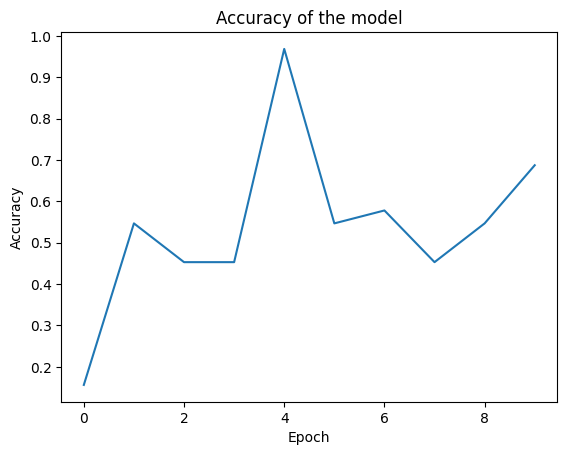

In [12]:
plt.plot(model.history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy of the model')
plt.show()

In [15]:
y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 497ms/step


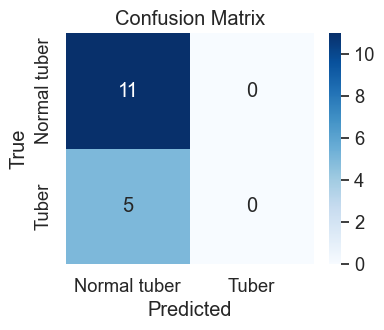

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Calculate the confusion matrix
confusion = confusion_matrix(y_true,y_pred)
# Define class labels
class_labels = [ 'Normal tuber','Tuber']
# Create a heatmap
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 0s 73ms/step


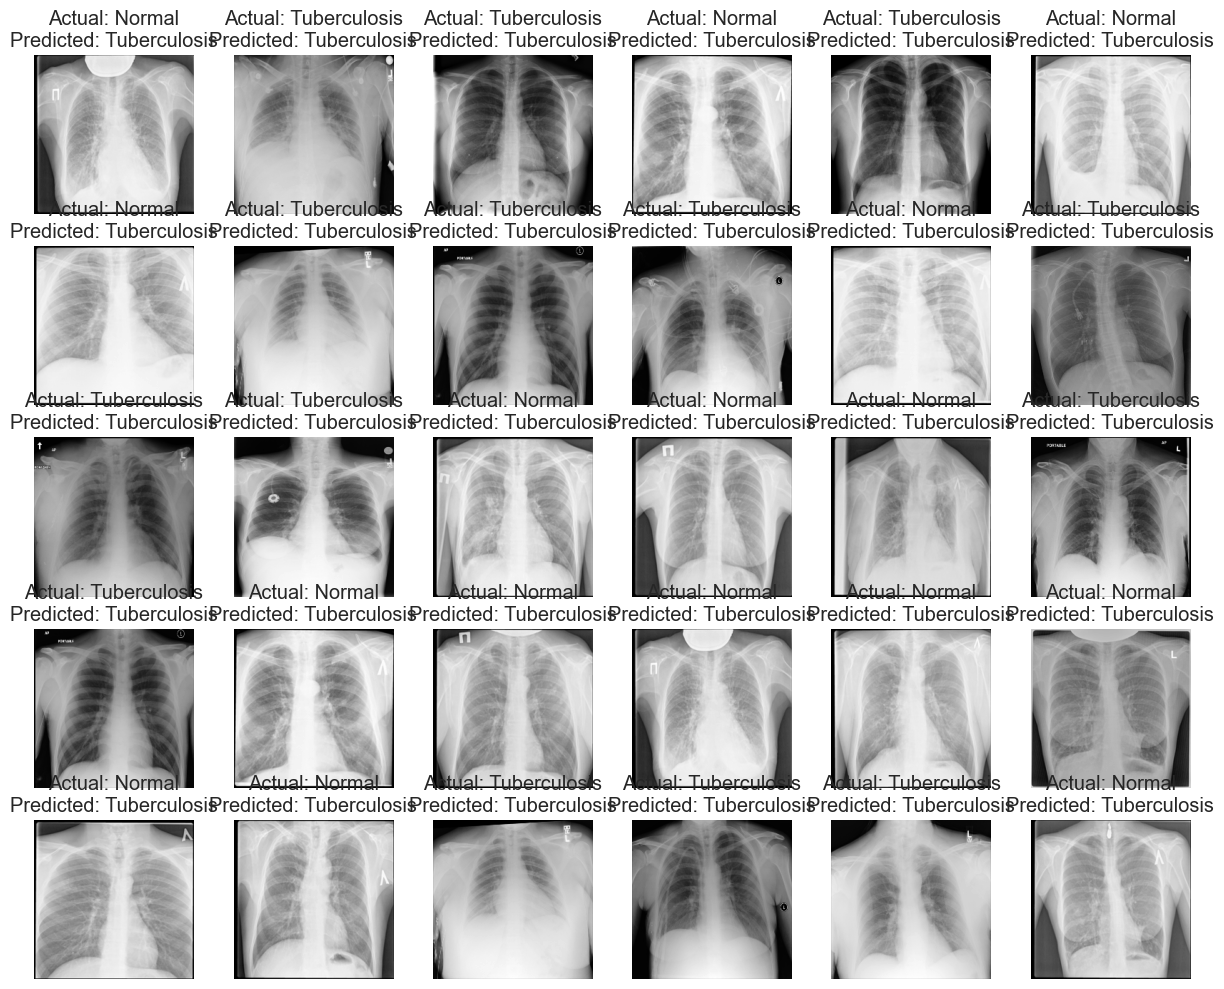

In [21]:
import random as rd

plt.figure(figsize=(15, 12))

for i in range(30):
    random_idx = rd.randint(0, len(F_DATA) - 1)
    img_path = F_DATA['images'][random_idx]
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224))  # Assuming the image size is 224x224 as in your code
    img = np.expand_dims(img, axis=0)
    actual_class = "Tuberculosis" if F_DATA['labels'][random_idx] == 1 else "Normal"
    
    # Predict class probabilities
    class_probabilities = model.predict(img)

    # Determine the predicted class based on the highest probability
    if class_probabilities[0, 1] > class_probabilities[0, 0]:
        predicted_class = "Tuberculosis"
    else:
        predicted_class = "Normal"

    plt.subplot(6, 7, i + 1)
    plt.imshow(img[0], cmap='gray')
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}")
    plt.axis('off')

plt.show()